In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
print ("Libraries sucessfully loaded")

Libraries sucessfully loaded


In [2]:
filename_exp = "data_experimentos_CLEAN.csv"

In [3]:
df = pd.read_csv(filename_exp)

In [4]:
df=df.drop(['Unnamed: 0'], axis = 1)
df

,exp_id,year,month,steel,hardness,condition,formability,surface-quality,shape,thick,width,len,recozimento
0,2,2020,8,R,0.0,S,2.0000,E,SHEET,0.700,1300.0,762.0,ruim
1,1368,2020,8,A,60.0,S,2.2147,G,COIL,2.801,385.1,0.0,ideal
2,1130,2020,8,A,60.0,S,2.2147,G,SHEET,0.801,255.0,269.0,ideal
3,402,2020,8,A,45.0,S,2.2147,D,COIL,1.600,610.0,0.0,mediano
4,407,2020,8,R,0.0,S,2.0000,E,SHEET,0.699,610.0,4880.0,ruim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,145,2019,8,A,0.0,S,3.0000,E,SHEET,1.200,609.9,1.0,ideal
1612,937,2019,8,R,0.0,S,3.0000,E,SHEET,1.601,830.0,880.0,ideal
1613,2228,2019,8,A,85.0,S,2.2147,G,COIL,0.400,20.0,0.0,ideal
1614,1263,2019,8,A,85.0,S,2.2147,G,COIL,4.000,610.0,0.0,ideal


In [5]:
df_dummy = pd.get_dummies(df['recozimento'])

In [6]:
df2=df.join(df_dummy)
df2=df2.drop(['recozimento'], axis = 1)
df2

,exp_id,year,month,steel,hardness,condition,formability,surface-quality,shape,thick,width,len,ideal,mediano,ruim
0,2,2020,8,R,0.0,S,2.0000,E,SHEET,0.700,1300.0,762.0,0,0,1
1,1368,2020,8,A,60.0,S,2.2147,G,COIL,2.801,385.1,0.0,1,0,0
2,1130,2020,8,A,60.0,S,2.2147,G,SHEET,0.801,255.0,269.0,1,0,0
3,402,2020,8,A,45.0,S,2.2147,D,COIL,1.600,610.0,0.0,0,1,0
4,407,2020,8,R,0.0,S,2.0000,E,SHEET,0.699,610.0,4880.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,145,2019,8,A,0.0,S,3.0000,E,SHEET,1.200,609.9,1.0,1,0,0
1612,937,2019,8,R,0.0,S,3.0000,E,SHEET,1.601,830.0,880.0,1,0,0
1613,2228,2019,8,A,85.0,S,2.2147,G,COIL,0.400,20.0,0.0,1,0,0
1614,1263,2019,8,A,85.0,S,2.2147,G,COIL,4.000,610.0,0.0,1,0,0


In [15]:
df2.corr()

,hardness,formability,thick,width,len,ideal,mediano,ruim
hardness,1.000000e+00,1.442663e-18,0.023384,-0.032118,-0.117843,0.163604,0.014564,-0.188835
formability,1.442663e-18,1.000000e+00,0.007200,-0.045600,-0.028614,0.059518,0.012116,-0.073566
thick,2.338412e-02,7.199723e-03,1.000000,0.015904,-0.083123,-0.000935,0.112718,-0.079476
width,-3.211824e-02,-4.559968e-02,0.015904,1.000000,0.107076,-0.037007,0.032633,0.017058
len,-1.178427e-01,-2.861357e-02,-0.083123,0.107076,1.000000,-0.057977,-0.072400,0.114936
ideal,1.636044e-01,5.951813e-02,-0.000935,-0.037007,-0.057977,1.000000,-0.449044,-0.769967
mediano,1.456400e-02,1.211643e-02,0.112718,0.032633,-0.072400,-0.449044,1.000000,-0.224384
ruim,-1.888348e-01,-7.356582e-02,-0.079476,0.017058,0.114936,-0.769967,-0.224384,1.000000


In [16]:
df2.corr()['hardness'].sort_values()

ruim          -1.888348e-01
len           -1.178427e-01
width         -3.211824e-02
formability    1.442663e-18
mediano        1.456400e-02
thick          2.338412e-02
ideal          1.636044e-01
hardness       1.000000e+00
Name: hardness, dtype: float64

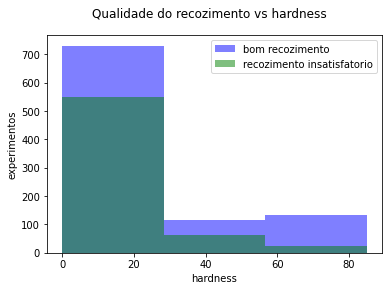

In [38]:
fig, ax = plt.subplots()

ax.hist(df2[df2["ideal"]==1]["hardness"], bins=3, alpha=0.5, color="blue", label="bom recozimento")
ax.hist(df2[df2["ideal"]==0]["hardness"], bins=3, alpha=0.5, color="green", label="recozimento insatisfatorio")

ax.set_xlabel("hardness")
ax.set_ylabel("experimentos")

fig.suptitle("Qualidade do recozimento vs hardness")

ax.legend();

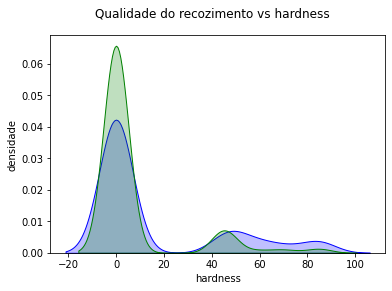

In [35]:
fig, ax = plt.subplots()

sns.kdeplot(df2[df2["ideal"]==1]["hardness"], shade=True, color="blue", label="bom recozimento", ax=ax)
sns.kdeplot(df2[df2["ideal"]==0]["hardness"], shade=True, color="green", label="recozimento ruim", ax=ax)

ax.set_xlabel("hardness")
ax.set_ylabel("densidade")

fig.suptitle("Qualidade do recozimento vs hardness");

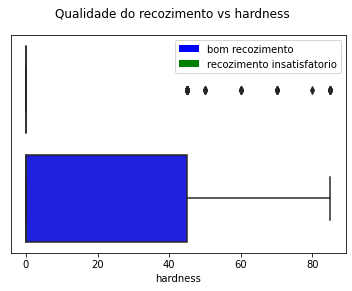

In [25]:
fig, ax = plt.subplots()

sns.boxplot(x="hardness", y="ideal", data=df2, orient="h", palette={1:"blue", 0:"green"}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Qualidade do recozimento vs hardness")

color_patches = [
    Patch(facecolor="blue", label="bom recozimento"),
    Patch(facecolor="green", label="recozimento insatisfatorio")
]
ax.legend(handles=color_patches);